<a href="https://colab.research.google.com/github/mrstask/dtp_statistics_kyiv/blob/master/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%94%D0%A2%D0%9F_%D0%9A%D0%B8%D1%97%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install requests-html

In [2]:
from requests_html import HTMLSession
session = HTMLSession()

r = session.get('https://kyivcity.gov.ua/dorohy_transport_ta_parkovky/dorozhniy_rukh_377411/dtp_statistika_ta_analiz_379515/')
parsed_data = r.html.xpath('//p')

In [3]:
raw_data = []
for p in parsed_data:
  raw_data.append(p.text)
raw_data = ' '.join(raw_data)
raw_data = raw_data.strip().replace('\n', '')
print(raw_data)

13.07.2020 За минулій тиждень (із 6 до 12 липня 2020 року) чергові Патрульної поліції зафіксували на дорогах Києва 660 ДТП (для порівняння, позаминулого шести денному тижні - 587).  39 з них - з потерпілими (позаминулого тижня - 47). Травми отримали 42 людини (на позаминулому тижні 48), загинуло п’ятеро людей (на позаминулому тижні загинуло двоє людей). Відбулося 11 наїздів на пішоходів, з них 4 - на пішохідних переходах. У дорожньо-транспортних пригодах постраждало десять мотоциклістів та шесть велосипедистів. 06.07.2020 За минулі шесть днів (із 30 червня до 5 липня 2020 року) чергові Патрульної поліції зафіксували на дорогах Києва 587 ДТП (для порівняння, позаминулого восьми денному тижні – 753).  47 з них – з потерпілими (позаминулого тижня – 46). Травми отримали 48 людини (на позаминулому тижні 53), загинуло двоє людей (на позаминулому тижні загинула одна особа). Відбулося 15 наїздів на пішоходів, з них 4 - на пішохідних переходах. У дорожньо-транспортних пригодах постраждало чотир

In [4]:
import re
filtered_data = []
dates = re.compile(r'\d{2}\.\d{2}.\d{4}').findall(raw_data)
print(dates)

['13.07.2020', '06.07.2020', '30.06.2020', '22.06.2020', '15.06.2020', '09.06.2020', '01.06.2020', '25.05.2020', '18.05.2020', '12.05.2020', '04.05.2020', '27.04.2020', '21.04.2020', '13.04.2020', '06.04.2020', '30.03.2020', '23.03.2020', '16.03.2020', '10.03.2020', '02.03.2020', '24.02.2020', '17.02.2020', '10.02.2020', '06.01.2020', '03.02.2020', '27.01.2020', '20.01.2020', '13.01.2020', '06.01.2020', '02.01.2020', '23.12.2019', '16.12.2019', '09.12.2019', '02.12.2019', '25.11.2019', '11.11.2019', '04.11.2019', '28.10.2019', '21.10.2019', '15.10.2019', '07.10.2019', '30.09.2019', '23.09.2019', '16.09.2019', '09.09.2019', '02.09.2019', '27.08.2019', '19.08.2019', '12.08.2019', '05.08.2019', '29.07.2019', '22.07.2019', '15.07.2019', '08.07.2019', '01.07.2019', '24.06.2019', '18.06.2019', '10.06.2019', '04.06.2019', '26.05.2019']


In [5]:
for d in dates:
  print(d)
  raw_data = raw_data.replace(d, f'|{d}\/')
print(raw_data)

13.07.2020
06.07.2020
30.06.2020
22.06.2020
15.06.2020
09.06.2020
01.06.2020
25.05.2020
18.05.2020
12.05.2020
04.05.2020
27.04.2020
21.04.2020
13.04.2020
06.04.2020
30.03.2020
23.03.2020
16.03.2020
10.03.2020
02.03.2020
24.02.2020
17.02.2020
10.02.2020
06.01.2020
03.02.2020
27.01.2020
20.01.2020
13.01.2020
06.01.2020
02.01.2020
23.12.2019
16.12.2019
09.12.2019
02.12.2019
25.11.2019
11.11.2019
04.11.2019
28.10.2019
21.10.2019
15.10.2019
07.10.2019
30.09.2019
23.09.2019
16.09.2019
09.09.2019
02.09.2019
27.08.2019
19.08.2019
12.08.2019
05.08.2019
29.07.2019
22.07.2019
15.07.2019
08.07.2019
01.07.2019
24.06.2019
18.06.2019
10.06.2019
04.06.2019
26.05.2019
|13.07.2020\/ За минулій тиждень (із 6 до 12 липня 2020 року) чергові Патрульної поліції зафіксували на дорогах Києва 660 ДТП (для порівняння, позаминулого шести денному тижні - 587).  39 з них - з потерпілими (позаминулого тижня - 47). Травми отримали 42 людини (на позаминулому тижні 48), загинуло п’ятеро людей (на позаминулому тижні заг

In [6]:
data_list = raw_data.split('|')
res_list = []
for item in data_list:
  if data_list:
    res_list.append(item.split('\/'))


In [8]:
data_dict = {}
for item in res_list:
  if len(item) >= 2:
    data_dict[item[0]] = item[1] if item[1] else item[2]

In [9]:
dict_of_dicts = {}
for key, value in data_dict.items():
  dict_of_dicts[key] = {'text': value.replace(u'\xa0', u' ')}
dict_of_dicts

{'01.06.2020': {'text': ' За минулий тиждень ( 25-31 травня 2020 року) чергові Патрульної поліції зафіксували на дорогах Києва 656 ДТП (для порівняння, позаминулого тижня – 677).  41 з них – з потерпілими (позаминулого тижня – 51). Травми отримали 45 людей (на позаминулому тижні – 53), на щастя, як і на позаминулому тижні загиблих немає. Відбулося 16 наїздів на пішоходів, з них 8 – на пішохідних переходах . У дорожньо-транспортних пригодах постраждало п’ять мотоциклістів та троє велосипедистів. Будьте максимально уважні та дотримуйтесь правил дорожнього руху, це допоможе зберегти здоров’я та врятувати життя. '},
 '01.07.2019': {'text': ' р. ДВОЄ ЗАГИБЛИХ В ДТП КИЄВА ЗА ТИЖДЕНЬ КП «Центр організації дорожнього руху» на підставі даних, що надійшли цілодобовим черговим про дорожньо-транспортної ситуації в місті Києві, повідомляє, що за тиждень із 24 до 30 червня 2019 року в місті зафіксовано 775 дорожньо-транспортних пригод (на попередньому тижні – 703), з них 37 з потерпілими (на поперед

In [10]:
for key, value in dict_of_dicts.items():
  raw_string = dict_of_dicts[key]['text']
  value = re.search(r'\d{1,4} (ДТП|ДОРОЖНЬО|дорожньо)', raw_string).group(0)
  dict_of_dicts[key]['accidents'] = re.findall(r'\d{1,4}', value)[0]
print(dict_of_dicts)

{'13.07.2020': {'text': ' За минулій тиждень (із 6 до 12 липня 2020 року) чергові Патрульної поліції зафіксували на дорогах Києва 660 ДТП (для порівняння, позаминулого шести денному тижні - 587).  39 з них - з потерпілими (позаминулого тижня - 47). Травми отримали 42 людини (на позаминулому тижні 48), загинуло п’ятеро людей (на позаминулому тижні загинуло двоє людей). Відбулося 11 наїздів на пішоходів, з них 4 - на пішохідних переходах. У дорожньо-транспортних пригодах постраждало десять мотоциклістів та шесть велосипедистів. ', 'accidents': '660'}, '06.07.2020': {'text': ' За минулі шесть днів (із 30 червня до 5 липня 2020 року) чергові Патрульної поліції зафіксували на дорогах Києва 587 ДТП (для порівняння, позаминулого восьми денному тижні – 753).  47 з них – з потерпілими (позаминулого тижня – 46). Травми отримали 48 людини (на позаминулому тижні 53), загинуло двоє людей (на позаминулому тижні загинула одна особа). Відбулося 15 наїздів на пішоходів, з них 4 - на пішохідних перехода

In [11]:
for key, value in dict_of_dicts.items():
  raw_string = dict_of_dicts[key]['text']
  value = re.search(r'\d{1,3} (із|з) них', raw_string)
  print(key, value)
  if value:
    value = value.group(0)
    dict_of_dicts[key]['victims'] = re.findall(r'\d{1,4}', value)[0]
  else:
    value = re.search(r'Із них \d{1,3} ', raw_string)
    if value:
      value = value.group(0)
      dict_of_dicts[key]['victims'] = re.findall(r'\d{1,4}', value)[0]
    else:
      dict_of_dicts[key]['victims'] = 0
print(dict_of_dicts)

13.07.2020 <_sre.SRE_Match object; span=(172, 180), match='39 з них'>
06.07.2020 <_sre.SRE_Match object; span=(182, 190), match='47 з них'>
30.06.2020 <_sre.SRE_Match object; span=(153, 161), match='46 з них'>
22.06.2020 <_sre.SRE_Match object; span=(151, 159), match='48 з них'>
15.06.2020 <_sre.SRE_Match object; span=(153, 161), match='41 з них'>
09.06.2020 <_sre.SRE_Match object; span=(151, 160), match='37 із них'>
01.06.2020 <_sre.SRE_Match object; span=(155, 163), match='41 з них'>
25.05.2020 <_sre.SRE_Match object; span=(156, 164), match='51 з них'>
18.05.2020 <_sre.SRE_Match object; span=(158, 166), match='33 з них'>
12.05.2020 <_sre.SRE_Match object; span=(155, 163), match='33 з них'>
04.05.2020 <_sre.SRE_Match object; span=(162, 170), match='32 з них'>
27.04.2020 <_sre.SRE_Match object; span=(165, 173), match='22 з них'>
21.04.2020 <_sre.SRE_Match object; span=(165, 173), match='20 з них'>
13.04.2020 <_sre.SRE_Match object; span=(135, 143), match='24 з них'>
06.04.2020 <_sre.SR

In [12]:
!pip3 install seaborn

In [13]:
import numpy as np
import pandas as pd

dates = list(dict_of_dicts.keys())
date_of = np.array(dates)
accidents = np.array([value['accidents'] for value in dict_of_dicts.values()])
victims = np.array([value['victims'] for value in dict_of_dicts.values()])

# convert to pandas dataframe
d = {'date_of': date_of, 'accidents': pd.to_numeric(accidents), 'victims': pd.to_numeric(victims)}
pdnumsqr = pd.DataFrame(d)
print(pdnumsqr)

       date_of  accidents  victims
0   13.07.2020        660       39
1   06.07.2020        587       47
2   30.06.2020        753       46
3   22.06.2020        690       48
4   15.06.2020        628       41
5   09.06.2020        681       37
6   01.06.2020        656       41
7   25.05.2020        677       51
8   18.05.2020        699       33
9   12.05.2020        649       33
10  04.05.2020        478       32
11  27.04.2020        376       22
12  21.04.2020        509       20
13  13.04.2020        448       24
14  06.04.2020        468       21
15  30.03.2020        421       24
16  23.03.2020        552       31
17  16.03.2020        696       27
18  10.03.2020        927       48
19  02.03.2020        852       36
20  24.02.2020        714       31
21  17.02.2020        804       40
22  10.02.2020        855       41
23  06.01.2020        443       25
24  03.02.2020        848       54
25  27.01.2020        756       38
26  20.01.2020        657       32
27  13.01.2020      

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


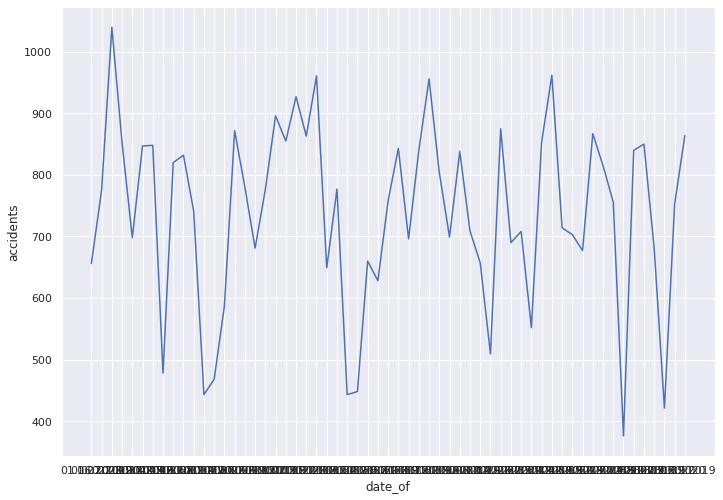

In [14]:
import seaborn as sns

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(x='date_of', y='accidents', data=pdnumsqr)
